# Compute the constituent supplied by landuse by area

This example shows the step by step computation, then shows how to translate that logic into a resuable query.


In [2]:
# Some steps required until these Python modules are properly installed...
import sys
sys.path.append('../Modules')

# Get the GBR specific module
import gbr
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Point the system at a particular output directory...
gbr.init('D:/Beckers/outputs/Scenario 1/')
gbr.available()

['Beta3810',
 'Beta3810FixNodes',
 'Beta3810Inflow',
 'Beta3810Junk',
 'Beta3810MinFlow',
 'Beta3810RemoveConts',
 'Beta3810Test',
 'Beta3810_2',
 'Beta3810_DoubleUSLE',
 'Beta3810_EMC',
 'Beta3810_FixRout',
 'Beta3810_test',
 'Beta3815',
 'Beta3815_RoutFix',
 'Beta3817',
 'Beta3818',
 'Beta3818_2',
 'Beta3818_NoCropOth',
 'Beta3818_NoFP',
 'Beta3818_NoFP2',
 'Beta3818_NoFP_PlusRes',
 'RecycleTest',
 'TestingPrep']

In [4]:
# Get a results set
results = gbr.Results('Beta3818')

In [5]:
results.available()

['climateTable',
 'CrossTabOutputsTable',
 'fuAreasTable',
 'FURatesTable',
 'FUSummaryTable',
 'joel_contributor',
 'latest_contributor',
 'OutletNodesRatesTable',
 'OverallSummaryTable',
 'ParameterTable',
 'RawResults',
 'RegionalSourceSinkSummaryTable',
 'RegionalSummaryTable',
 'SourceSinkPerFuSummaryTable',
 'SourceSinkSummaryTable',
 'TimeSeriesTable']

In [6]:
fuData = results.get('FUSummaryTable')
fuData

,FU,Total_Load_in_Kg
Constituent,,
P_Particulate,Cropping,0.000000e+00
P_Particulate,Grazing,2.094983e+09
P_Particulate,Grazing Closed,2.361782e+09
P_Particulate,Other,1.441621e+08
P_Particulate,Water,3.609331e+06
Ametryn,Cropping,0.000000e+00
Ametryn,Grazing,0.000000e+00
Ametryn,Grazing Closed,0.000000e+00
Ametryn,Other,0.000000e+00


In [7]:
SupplyByLanduse_kg = fuData.reset_index().pivot('Constituent','FU','Total_Load_in_Kg')
SupplyByLanduse_kg

FU,Cropping,Grazing,Grazing Closed,Other,Water
Constituent,,,,,
Ametryn,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
Atrazine,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
N_DIN,4.836041e+07,4.652394e+08,1.720243e+08,0.000000e+00,605828.327441
N_DON,4.836041e+07,4.652394e+08,1.720243e+08,0.000000e+00,605828.327441
N_Particulate,8.034205e+07,1.146588e+09,2.866852e+09,9.028642e+07,3585565.990618
P_DOP,0.000000e+00,4.652394e+08,1.720243e+08,1.078517e+04,605828.327441
P_FRP,0.000000e+00,4.652394e+08,1.720243e+08,1.078517e+04,605828.327441
P_Particulate,0.000000e+00,2.094983e+09,2.361782e+09,1.441621e+08,3609331.438365
Sediment - Coarse,5.696785e+07,1.416679e+09,3.761698e+09,1.153735e+08,2617297.375432


In [8]:
SupplyByLanduse_t = SupplyByLanduse_kg/1000.0
SupplyByLanduse_t

FU,Cropping,Grazing,Grazing Closed,Other,Water
Constituent,,,,,
Ametryn,0.000000,0.000000,0.000000,0.000000,0.000000
Atrazine,0.000000,0.000000,0.000000,0.000000,0.000000
N_DIN,48360.407997,465239.444921,172024.277874,0.000000,605.828327
N_DON,48360.407997,465239.444921,172024.277874,0.000000,605.828327
N_Particulate,80342.048058,1146588.357639,2866852.150093,90286.421464,3585.565991
P_DOP,0.000000,465239.444921,172024.277874,10.785170,605.828327
P_FRP,0.000000,465239.444921,172024.277874,10.785170,605.828327
P_Particulate,0.000000,2094982.558569,2361781.828970,144162.127855,3609.331438
Sediment - Coarse,56967.845023,1416679.289583,3761697.769276,115373.537116,2617.297375


In [9]:
FUAreas_m2 = results.get('fuAreasTable')
FUAreas_m2

,FU,Area
Catchment,,
SC #3,Cropping,8.074063e+08
SC #3,Grazing,0.000000e+00
SC #3,Grazing Closed,1.330350e+10
SC #3,Other,3.993125e+08
SC #3,Water,6.187500e+06
SC #2,Cropping,5.402813e+08
SC #2,Grazing,5.937374e+09
SC #2,Grazing Closed,1.178470e+09
SC #2,Other,2.325625e+08


In [10]:
TotalFuAreas_m2 = FUAreas_m2.groupby('FU').sum()
TotalFuAreas_m2

,Area
FU,
Cropping,2.357047e+09
Grazing,1.905660e+10
Grazing Closed,1.588164e+10
Other,1.534703e+09
Water,2.900000e+07


In [11]:
TotalFuAreas_ha = TotalFuAreas_m2.Area/10000.0
TotalFuAreas_ha

FU
Cropping           235704.687480
Grazing           1905659.607422
Grazing Closed    1588163.830106
Other              153470.312491
Water                2899.999998
Name: Area, dtype: float64

In [12]:
SupplyLandUse_per_ha = SupplyByLanduse_t/TotalFuAreas_ha
SupplyLandUse_per_ha

FU,Cropping,Grazing,Grazing Closed,Other,Water
Constituent,,,,,
Ametryn,0.000000,0.000000,0.000000,0.000000,0.000000
Atrazine,0.000000,0.000000,0.000000,0.000000,0.000000
N_DIN,0.205174,0.244136,0.108316,0.000000,0.208906
N_DON,0.205174,0.244136,0.108316,0.000000,0.208906
N_Particulate,0.340859,0.601675,1.805136,0.588299,1.236402
P_DOP,0.000000,0.244136,0.108316,0.000070,0.208906
P_FRP,0.000000,0.244136,0.108316,0.000070,0.208906
P_Particulate,0.000000,1.099348,1.487115,0.939349,1.244597
Sediment - Coarse,0.241692,0.743406,2.368583,0.751765,0.902516


In [13]:
# Translating it to a reusable function
def exportPerLandusePerHa(results):
    FUAreas_ha = results.get('fuAreasTable').groupby('FU').sum() / 10000.0

    fuData_kg = results.get('FUSummaryTable')
    SupplyByFU_t = fuData_kg.reset_index().pivot('Constituent','FU','Total_Load_in_Kg') / 1000.0
    
    return SupplyByFU_t / FUAreas_ha.Area


In [14]:
# Call the new function
exportPerLandusePerHa(results)

FU,Cropping,Grazing,Grazing Closed,Other,Water
Constituent,,,,,
Ametryn,0.000000,0.000000,0.000000,0.000000,0.000000
Atrazine,0.000000,0.000000,0.000000,0.000000,0.000000
N_DIN,0.205174,0.244136,0.108316,0.000000,0.208906
N_DON,0.205174,0.244136,0.108316,0.000000,0.208906
N_Particulate,0.340859,0.601675,1.805136,0.588299,1.236402
P_DOP,0.000000,0.244136,0.108316,0.000070,0.208906
P_FRP,0.000000,0.244136,0.108316,0.000070,0.208906
P_Particulate,0.000000,1.099348,1.487115,0.939349,1.244597
Sediment - Coarse,0.241692,0.743406,2.368583,0.751765,0.902516


In [15]:

# Or, once folded back into the shared module...
lu_t_y = results.queries.export_per_landuse_per_ha('t/y') # To get it in tons/ha/yr
lu_t_y

FU,Cropping,Grazing,Grazing Closed,Other,Water
Constituent,,,,,
Ametryn,0.000000,0.000000,0.000000,0.000000,0.000000
Atrazine,0.000000,0.000000,0.000000,0.000000,0.000000
N_DIN,0.033726,0.040131,0.017805,0.000000,0.034340
N_DON,0.033726,0.040131,0.017805,0.000000,0.034340
N_Particulate,0.056030,0.098903,0.296726,0.096704,0.203238
P_DOP,0.000000,0.040131,0.017805,0.000012,0.034340
P_FRP,0.000000,0.040131,0.017805,0.000012,0.034340
P_Particulate,0.000000,0.180710,0.244450,0.154409,0.204586
Sediment - Coarse,0.039729,0.122200,0.389345,0.123574,0.148355


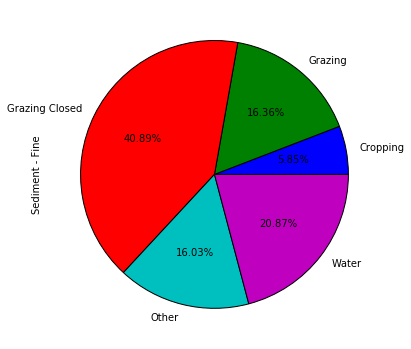

In [20]:
# We can also make some plots of the data here...
# Heaps of options...
lu_t_y.transpose().plot(kind='pie',y='Sediment - Fine',legend=False,figsize=(6,6),autopct='%.2f%%').set_aspect('equal')